## Лабораторная работа №2

Импортируем библиотеки

In [106]:

import pandas as pd
import plotly.express as px
import plotly
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact, interactive
import ipywidgets as widgets
from plotly.offline import iplot

Создаём Pandas DataFrame из файла IBM.csv

In [84]:
file_path = 'IBM.csv'
df = pd.read_csv(file_path)

Отрисуем график стоимости акций

In [88]:
fig = go.FigureWidget(layout_yaxis_range=[0,np.max(df['Close'])*1.1])
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode="lines+markers"
))
fig.update_xaxes(title='Дата')
fig.update_yaxes(title='Стоимость')
fig

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '50cec786-3de8-415b-bd6f-c2a978bd1a0d',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])}],
    'layout': {'template': '...',
               'xaxis': {'title': {'text': 'Дата'}},
               'yaxis': {'range': [0, 165.6270077], 'title': {'text': 'Стоимость'}}}
})

### Сглаживание: Скользящее среднее

In [89]:
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    full_data = np.pad(data, (window_size, ), 'edge')
    return np.convolve(full_data, weights, 'valid')

In [90]:
trace1 = go.Scatter(x=df['Date'], y=df['Close'], mode="lines+markers", name='Исходные данные')
window_size = 2
rolling_mean = moving_average(df['Close'], window_size)
trace2 = go.Scatter(x=df['Date'], y=rolling_mean, mode="lines+markers", name=f'Скользящее среднее {window_size}')
fig = go.FigureWidget(data=[trace1,trace2])
fig.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')

def response(x):
    window_size = int(x)
    rolling_mean = moving_average(df['Close'], window_size)
    fig["data"][1].y = rolling_mean
    fig["data"][1].name = f'Скользящее среднее {window_size}'
    

interact(response, x=widgets.IntSlider(min=2, max=len(df['Date']), step=1, value=2))
fig

interactive(children=(IntSlider(value=2, description='x', max=250, min=2), Output()), _dom_classes=('widget-in…

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': 'b143e7fd-e108-463e-9a3e-59375e4ff1a0',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines+markers',
              'name': 'Скользящее среднее 2',
              'type': 'scatter',
              'uid': '076d3d2b-5cda-42f8-92d0-9084bb30a3af',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003 , 127.730003 , 127.015003 , ..., 146.6700055, 145.990005 ,
                          145.990005 ])}],
    'layout': {'template': '...', 'xaxis': {'ti

### Сглаживание: Экспоненциальное скользящее среднее

In [91]:
def exponential_moving_average(data, alpha):
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[i - 1])
    return ema

In [93]:
trace1 = go.Scatter(x=df['Date'], y=df['Close'], mode="lines+markers", name='Исходные данные')
alpha = 0
rolling_mean = exponential_moving_average(df['Close'], alpha)
trace2 = go.Scatter(x=df['Date'], y=rolling_mean, mode="lines+markers", name=f'EMA {alpha}')
fig = go.FigureWidget(data=[trace1,trace2])
fig.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')

def response(x):
    alpha = x
    rolling_mean = exponential_moving_average(df['Close'], alpha)
    fig["data"][1].y = rolling_mean
    fig["data"][1].name = f'EMA {alpha}'

interact(response, x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0))
fig

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': '74f1cd2a-938d-4cfc-85ed-d9d36d6dddf5',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines+markers',
              'name': 'EMA 0.0',
              'type': 'scatter',
              'uid': '85603c3a-4cd7-4e6e-9e6a-34f136581974',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': [127.730003, 127.730003, 127.730003, ..., 127.730003,
                    127.730003, 127.730003]}],
    'layout': {'template': '...', 'xaxis': {'title': {'text': 'Дата'}}, 'yaxis'

### Сглаживание: Метод Хольта

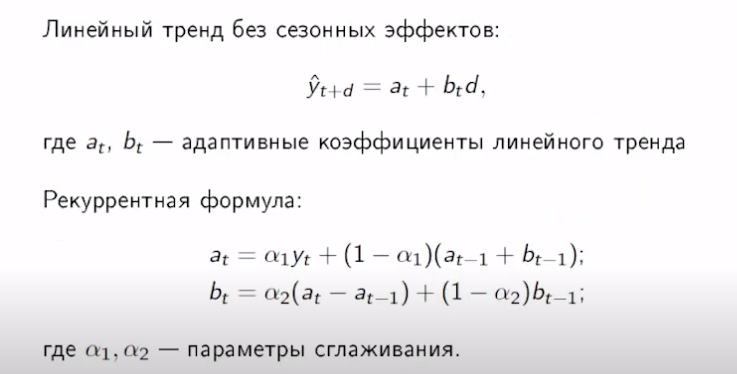

In [97]:
def holt_smoothing(data, alpha, beta):
    n = len(data)
    level = [data[0]]
    trend = [data[1] - data[0]]
    smoothed = [data[0]]

    for i in range(1, n):
        level.append(alpha * data[i] + (1 - alpha) * (level[i-1] + trend[i-1]))
        trend.append(beta * (level[i] - level[i-1]) + (1 - beta) * trend[i-1])
        smoothed.append(level[i] + trend[i])

    return smoothed

In [112]:
trace1 = go.Scatter(x=df['Date'], y=df['Close'], mode="lines+markers", name='Исходные данные')
alpha = 0
beta = 0
rolling_mean = holt_smoothing(df['Close'], alpha, beta)
trace2 = go.Scatter(x=df['Date'], y=rolling_mean, mode="lines+markers", name=f'Holt {alpha}')
fig = go.FigureWidget(data=[trace1,trace2])
fig.update_layout(xaxis_title='Дата', yaxis_title='Стоимость')

def redraw():
    rolling_mean = holt_smoothing(df['Close'], alpha, beta)
    fig["data"][1].y = rolling_mean
    fig["data"][1].name = f'Holt alpha = {alpha}, beta = {beta}'

def response(a, b):
    global alpha
    global beta
    alpha, beta = a,b
    redraw()
    
def response_alpha(x):
    global alpha
    alpha = x
    redraw()
    
def response_beta(x):
    global beta
    beta = x
    redraw()

    
a = widgets.FloatSlider(min=0, max=1, step=0.01, value=0, description="alpha")
b = widgets.FloatSlider(min=0, max=1, step=0.01, value=0, description="beta")
interact(response, a=a, b=b)
fig

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0, step=0.01), FloatSlider(value=0.0, …

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Исходные данные',
              'type': 'scatter',
              'uid': '0ce1c5fe-359a-4a9f-8fc8-856422397241',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': array([127.730003, 126.300003, 124.93    , ..., 146.550003, 147.350006,
                          145.990005])},
             {'mode': 'lines+markers',
              'name': 'Holt alpha = 0.0, beta = 0.0',
              'type': 'scatter',
              'uid': '102c61b5-6623-4168-8ef7-2955cc88860c',
              'x': array(['2022-09-19', '2022-09-20', '2022-09-21', ..., '2023-09-13',
                          '2023-09-14', '2023-09-15'], dtype=object),
              'y': [127.730003, 124.87000300000001, 123.44000300000002, ...,
                    -226.90999699999912, -228.33999699999913, -229.76999699999914]}],
    'layout': {